<a href="https://colab.research.google.com/github/mohitsharmas97/revision/blob/main/Cifar_10_by_pytorch_day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device :{device}")

Using device :cuda


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayush1220/cifar10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cifar10


In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
#data augmentation by adding flip images and rotate images in train dataset in train dataset.....
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomly flip images horizontally
    transforms.RandomRotation(10),     # Randomly rotate images by up to 10 degrees
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
batch_size=32


train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=train_transform)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=test_transform)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
learning_rate=0.1
epochs=40


In [ ]:
class MyNN(nn.Module):
  def __init__(self, input_features): # input_features will be 3
    super().__init__()

    self.features = nn.Sequential(
        # Change input_features to 3 for RGB images
        nn.Conv2d(input_features, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2, stride=2), # Output: 32 x 16 x 16

        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2), # Output: 64 x 8 x 8

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2) # Output: 128 x 4 x 4
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        # --- UPDATE INPUT SIZE --- (128 channels * 4 * 4)
        nn.Linear(128 * 4 * 4, 256), # Increased size of linear layers
        nn.ReLU(),
        nn.Dropout(p=0.5), # Slightly increased dropout
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.features(x)
    # The torch.flatten line is no longer needed because nn.Flatten() is in the classifier
    # x = torch.flatten(x, start_dim=1)
    x = self.classifier(x)
    return x



In [ ]:
# Instantiate the model with 3 input channels
model = MyNN(3) # Use 3 for the input_features that is 3 rgb channels
model.to(device)

# The rest of your code for criterion and optimizer is perfect
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # A slightly lower learning rate like 0.01 often works well for CIFAR-10

from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.1) # Every 10 epochs, LR is multiplied by 0.1

In [ ]:
#training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    #move data to gpu
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)


    #forward pass
    outputs=model(batch_features)

    #calculate loss
    loss=criterion(outputs,batch_labels)

    optimizer.zero_grad()

    #backward passs
    loss.backward()

    #update grads means parameter
    optimizer.step()

    total_epoch_loss+=loss.item()
    avg_loss=total_epoch_loss/len(train_loader)

  print(f'Epoch:{epoch+1},{epochs}, Loss: {avg_loss:.4f}')
  scheduler.step() # Add this line to update the learning rate

Epoch:1,40, Loss: 1.5001
Epoch:2,40, Loss: 1.1705
Epoch:3,40, Loss: 1.0322
Epoch:4,40, Loss: 0.9521
Epoch:5,40, Loss: 0.8978
Epoch:6,40, Loss: 0.8577
Epoch:7,40, Loss: 0.8213
Epoch:8,40, Loss: 0.7844
Epoch:9,40, Loss: 0.7683
Epoch:10,40, Loss: 0.7420
Epoch:11,40, Loss: 0.6486
Epoch:12,40, Loss: 0.6103
Epoch:13,40, Loss: 0.6005
Epoch:14,40, Loss: 0.5837
Epoch:15,40, Loss: 0.5724
Epoch:16,40, Loss: 0.5602
Epoch:17,40, Loss: 0.5587
Epoch:18,40, Loss: 0.5418
Epoch:19,40, Loss: 0.5382
Epoch:20,40, Loss: 0.5307
Epoch:21,40, Loss: 0.5225
Epoch:22,40, Loss: 0.5162
Epoch:23,40, Loss: 0.5181
Epoch:24,40, Loss: 0.5139
Epoch:25,40, Loss: 0.5120
Epoch:26,40, Loss: 0.5087
Epoch:27,40, Loss: 0.5090
Epoch:28,40, Loss: 0.5161
Epoch:29,40, Loss: 0.5102
Epoch:30,40, Loss: 0.5034
Epoch:31,40, Loss: 0.5090
Epoch:32,40, Loss: 0.5019
Epoch:33,40, Loss: 0.5084
Epoch:34,40, Loss: 0.5105
Epoch:35,40, Loss: 0.5098
Epoch:36,40, Loss: 0.5065
Epoch:37,40, Loss: 0.5084
Epoch:38,40, Loss: 0.5085
Epoch:39,40, Loss: 0.

In [ ]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0

In [ ]:
#evaluation code

total=0
correct=0
with torch.no_grad():

  for batch_features,batch_labels in test_loader:

     #move data to gpu
     batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

     outputs=model(batch_features)
     predicted=torch.max(outputs,1)
     total=total+batch_labels.shape[0]
     correct=correct+(predicted.indices==batch_labels).sum().item()

accuracy=correct/total
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:81.97%


In [ ]:
#evaluation code

total=0
correct=0
with torch.no_grad():

  for batch_features,batch_labels in train_loader:

     #move data to gpu
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

    outputs=model(batch_features)
    predicted=torch.max(outputs,1)
    total=total+batch_labels.shape[0]
    correct=correct+(predicted.indices==batch_labels).sum().item()

accuracy=correct/total
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:86.79%


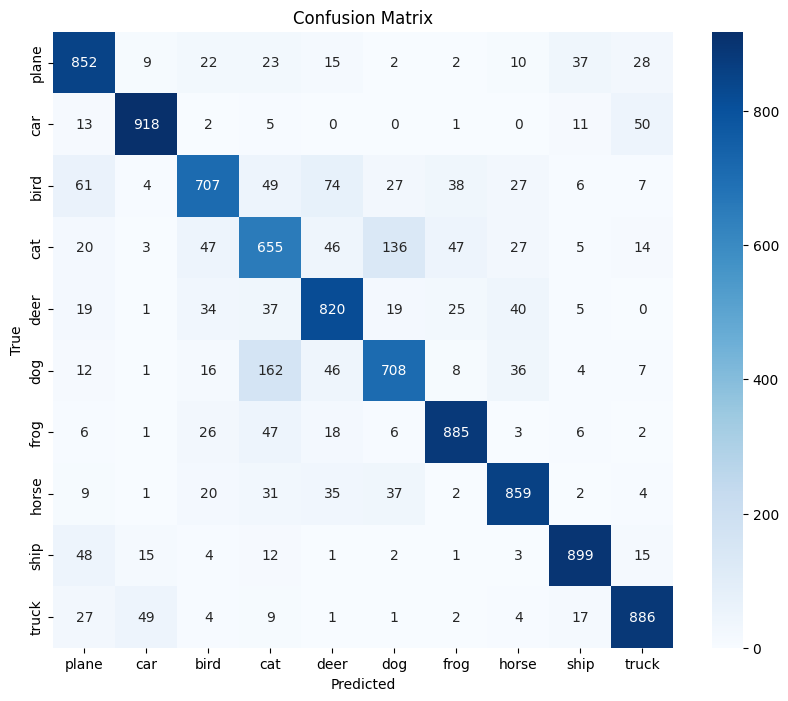

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

model.eval() # Set the model to evaluation mode
all_labels = []
all_predicted = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(batch_labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the path to save the model
model_save_path = 'cifar10_model.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to cifar10_model.pth


Predicted:  cat ship plane plane frog
True Labels:  cat ship ship plane frog


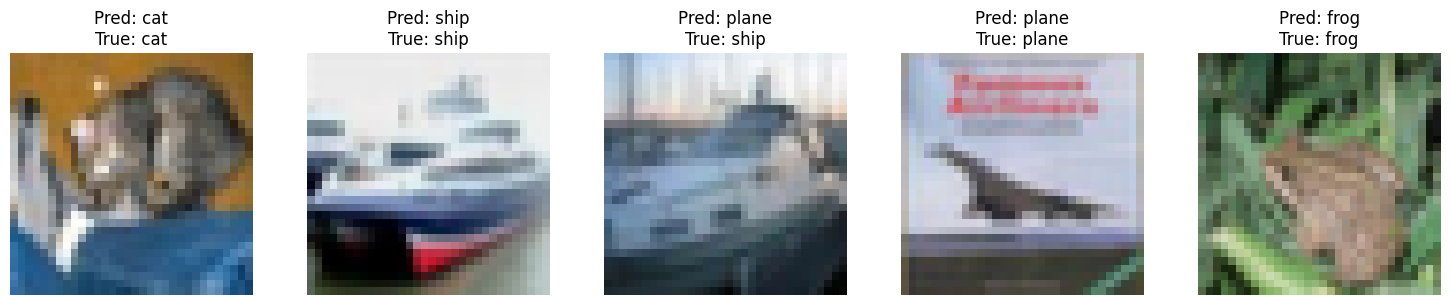

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test images and labels
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Select the first 5 images and move them to the device
sample_images = images[:5].to(device)
sample_labels = labels[:5]

# Get predictions from the model
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(sample_images)
    _, predicted = torch.max(outputs.data, 1)

# Display the images and predictions
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(5)))
print('True Labels: ', ' '.join(f'{classes[sample_labels[j]]}' for j in range(5)))

# Show the images
# The images are normalized, so we need to unnormalize them for display
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax = axes[i]
    img = images[i]
    # Unnormalize and display the image
    img = img / 2 + 0.5
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f'Pred: {classes[predicted[i]]}\nTrue: {classes[sample_labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()